In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

rc('text', usetex=True)

def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

def getData(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')


    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

Welcome to JupyROOT 6.15/01


In [2]:
def getJetData(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    scalar.append('quark_eta')
    scalar.append('quark_theta')
    scalar.append('quark_p')
    scalar.append('quark_pt')
    scalar.append('quark_id')
    cols.append('n_total')
    cols.append('n_charged')
    cols.append('jet_eta')
    cols.append('jet_theta')
    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_charge')

    cols.append('dphi_e_jet')
    cols.append('dR_q_jet')
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, '0.1 < y < 0.85', '0.1 < y < 0.85')
    temp = applyCut(temp, 'Q2>25', 'Q2>25')
    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    #temp.eval('dphi = 3.14159-dphi_e_jet', inplace=True)
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [4]:
def applyCutsJets(df):
    temp = df
    temp = applyCut(temp, 'y>0.04 ', 'y>0.04')
    temp = applyCut(temp, 'Q2>25', 'Q2>25')
    temp = applyCut(temp, 'jet_pt>5', 'jet_pt>5')
    temp = applyCut(temp, 'jet_eta<3.0', 'jet_eta<3.0')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    temp.eval('dphi = 3.14159-dphi_e_jet', inplace=True)
    temp.eval('jet_qtnorm= jet_qt/sqrt(Q2)', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/sqrt(jet_pt)', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/sqrt(e_pt)', inplace=True)

   # df = applyCut(df, 'n_total>1', ' n>1')
    return temp

In [5]:
df = getData(['HERA.root'])
xsec = np.mean(df['xsec'])
xsec = xsec*1e9
print 'xsection %2.2f [pb]' %(xsec)
accepted = df.shape[0]
print 'accepted events' , accepted
to_cross_section = xsec/(1.0*accepted)

df = applyCuts(df)
print 'Accepted cross-section: %2.0f [pb]'%(df.shape[0]*to_cross_section)

##Total cross-section: 
## in units of fb:
lumi = 100 # in units of fb-1. 
integrated_rate    = 1000*lumi*xsec #multiply by 1000 and then 100 to get integrated yield for 100 fb-1
print 'Integrated rate %2.3f [M]' %(integrated_rate/1e6)










Processed HERA.root in 0.2 seconds
xsection 7044.44 [pb]
accepted events 10000
0.1 < y < 0.85 5194  fraction kept: 51.9
Q2>25 5194  fraction kept: 100.0
Accepted cross-section: 3659 [pb]
Integrated rate 704.444 [M]


In [ ]:
df = getData(['NC_20_250.root'])
xsec = np.mean(df['xsec'])
xsec = xsec*1e9
print 'xsection %2.2f [pb]' %(xsec)
accepted = df.shape[0]
print 'accepted events' , accepted
to_cross_section = xsec/(1.0*accepted)

df = applyCuts(df)
print 'Accepted cross-section: %2.0f [pb]'%(df.shape[0]*to_cross_section)


fig, ax1 = plt.subplots(figsize=(8,6))


Frank_x = [50.0, 100.0 ,150.0, 200.0 ,250.0,300.0,350.0,400.0 ,450.0,500.0]
Frank_y = [174.548611821, 29.7689334957, 11.4497244841, 5.8508104121,3.48242036824,2.2766642155,1.58607089636,1.15761868311,0.876006984652,0.680301593143]

errx = 25*np.ones(len(Frank_x))
plt.errorbar(Frank_x,Frank_y,xerr=errx, label='PLB 763 (2016) 52-59, \nF. Petriello priv comm')
plt.yscale('log')



y, x  = np.histogram(df['Q2'],bins=np.linspace(25,525,11))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y = y*to_cross_section
y = y/(xerr*2.0)

plt.errorbar(x,y,  xerr = xerr, fmt='.',ls='none',label='Pythia8')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('$Q^{2}$\ $[\mathrm{GeV}^{2}]$',fontsize=18)
plt.ylabel(r'd$\sigma$/$Q^{2}$ [pb]',fontsize=18)
plt.title('$\mathrm{NC}\ \mathrm{DIS}$, $20+250$ $\mathrm{GeV}$, $0.1<y<0.85$', fontsize=18)

plt.legend(loc='best',frameon=False,fontsize=18)
print y 
print Frank_y
print np.divide(Frank_y,y)
plt.show()



Processed HERA.root in 0.4 seconds
y>0.04 10972  fraction kept: 79.4
Q2>25 10972  fraction kept: 100.0
jet_pt>5 7973  fraction kept: 72.7
jet_eta<3.0 7853  fraction kept: 98.5
[ 7.   9.  12.  17.5 25.  38.  59.  99. ]
[ 1.   1.   2.   3.5  4.   9.  12.  28. ]


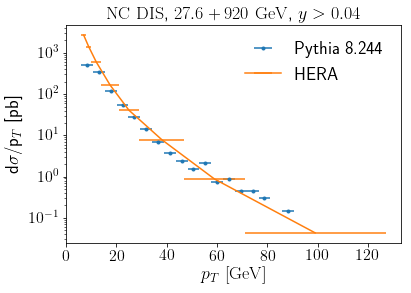

In [11]:



df_jet = getJetData(['HERA.root'])
df_jet = applyCutsJets(df_jet)

y, x  = np.histogram(df_jet['jet_pt'],bins=np.linspace(6,100,21))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y = y*to_cross_section
y = y/(xerr*2.0)

plt.errorbar(x,y,  xerr = xerr, fmt='.',ls='none',label='Pythia 8.244')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('$p_{T}$\ $[\mathrm{GeV}]$',fontsize=18)
plt.ylabel(r'd$\sigma$/p_{T}$ [pb]',fontsize=18)
plt.title('$\mathrm{NC}\ \mathrm{DIS}$, $27.6+920$ $\mathrm{GeV}$, $y>0.04$', fontsize=18)


y = np.array([2685, 1408,599.9,165.55,40.59,7.90, 0.873, 0.0433])
xdo = np.array([6,8,10,14,21,29,47,71])
xup = np.array([8,10,14,21,29,47,71,127])
errx = (xup-xdo)/2.0
x = (xup+xdo)/2.0
print x
print errx

plt.errorbar(x, y, xerr=errx,label='HERA')
plt.legend(loc='best',frameon=False,fontsize=18)

plt.yscale('log')